Notebook ini adalah sebuah miniproject hasil latihan setelah mengikuti kelas pelatihan Data Engineer yang diprakarsai oleh DTS Kominfo bermitra dengan DQLab.
<br/><br/>
Dalam notebook ini ialah sebuah dataset dimana membersihkan data dari data-data ganda dan data yang hilang/tidak ada dan memprofile data kembali menjadi lebih rapi.
<br/><br/>
Share link : <br/>
(FULL) https://colab.research.google.com/drive/1sH3qmnNMhkMsmkdsnoBFZFrN8gEhv8PT?usp=sharing<br/>
(SHORT) https://tinyurl.com/a12iwdataprofiling

In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling
import matplotlib.pyplot as plt

In [ ]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

In [ ]:
#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw1.head(20))

Lima data teratas:
    InvoiceNo                          Description  Quantity     InvoiceDate  \
0      536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1      536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2      536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3      536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4      536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   
5      536370         SET 7 BABUSHKA NESTING BOXES       2.0  12/01/10 08.26   
6      536371    GLASS STAR FROSTED T-LIGHT HOLDER       6.0  12/01/10 08.26   
7      536372               HAND WARMER UNION JACK       6.0  12/01/10 08.28   
8      536373            HAND WARMER RED POLKA DOT       6.0  12/01/10 08.28   
9      536374        ASSORTED COLOUR BIRD ORNAMENT      32.0  12/01/10 08.34   
10     536375            POPPY'S PLAYHOUSE BEDROOM       6.0  12/01/10 08.34   
11     536376        

In [ ]:
#Check kolom yang mengandung missing value
print('Kolom dengan missing value:') 
print(uncleaned_raw1.isnull().any())

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool


In [ ]:
#Persentase missing value
length_qty = len(uncleaned_raw1['Quantity'])
count_qty = uncleaned_raw1['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty * 100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw1['Quantity'] = uncleaned_raw1['Quantity'].fillna(uncleaned_raw1['Quantity'].mean())

Persentase missing value kolom Quantity: 4.0%


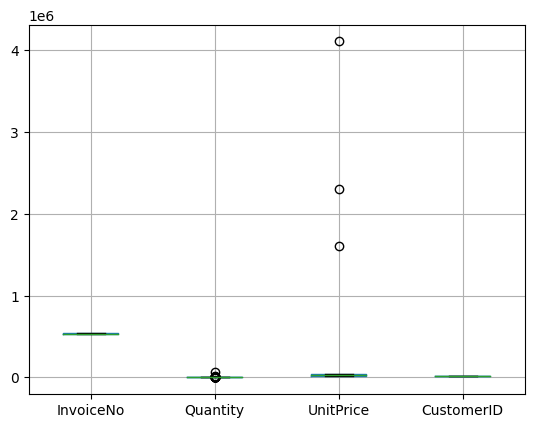

In [ ]:
plt.style.use('default')

uncleaned_raw2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')
uncleaned_raw2['Quantity'] = uncleaned_raw2['Quantity'].fillna(uncleaned_raw2['Quantity'].mean())

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw2.boxplot()
plt.show()

In [ ]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#Check IQR
Q1 = uncleaned_raw3['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw3['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw3 = uncleaned_raw3[~((uncleaned_raw3[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw3[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw3.duplicated(subset=None))

#remove duplication
uncleaned_raw3 = uncleaned_raw3.drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool


In [ ]:
#mengecek dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw3.head(20))

Lima data teratas:
    InvoiceNo Description  Quantity InvoiceDate  UnitPrice  CustomerID City
0         NaN         NaN       NaN         NaN    29000.0         NaN  NaN
1         NaN         NaN       NaN         NaN    41000.0         NaN  NaN
2         NaN         NaN       NaN         NaN    18000.0         NaN  NaN
3         NaN         NaN       NaN         NaN    38000.0         NaN  NaN
4         NaN         NaN       NaN         NaN    27000.0         NaN  NaN
5         NaN         NaN       NaN         NaN    24000.0         NaN  NaN
6         NaN         NaN       NaN         NaN    26000.0         NaN  NaN
7         NaN         NaN       NaN         NaN    44000.0         NaN  NaN
8         NaN         NaN       NaN         NaN    28000.0         NaN  NaN
9         NaN         NaN       NaN         NaN    17000.0         NaN  NaN
10        NaN         NaN       NaN         NaN    30000.0         NaN  NaN
11        NaN         NaN       NaN         NaN    33000.0         Na